In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
default = pd.read_csv('../data/credit_card_default.csv')
default.rename(columns=lambda x: x.lower(), inplace=True)
default.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
# Base values: female, other_education, not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay_n features if >0 then it means the customer was delayed on that month
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    default[p] = (default[p] > 0).astype(int)

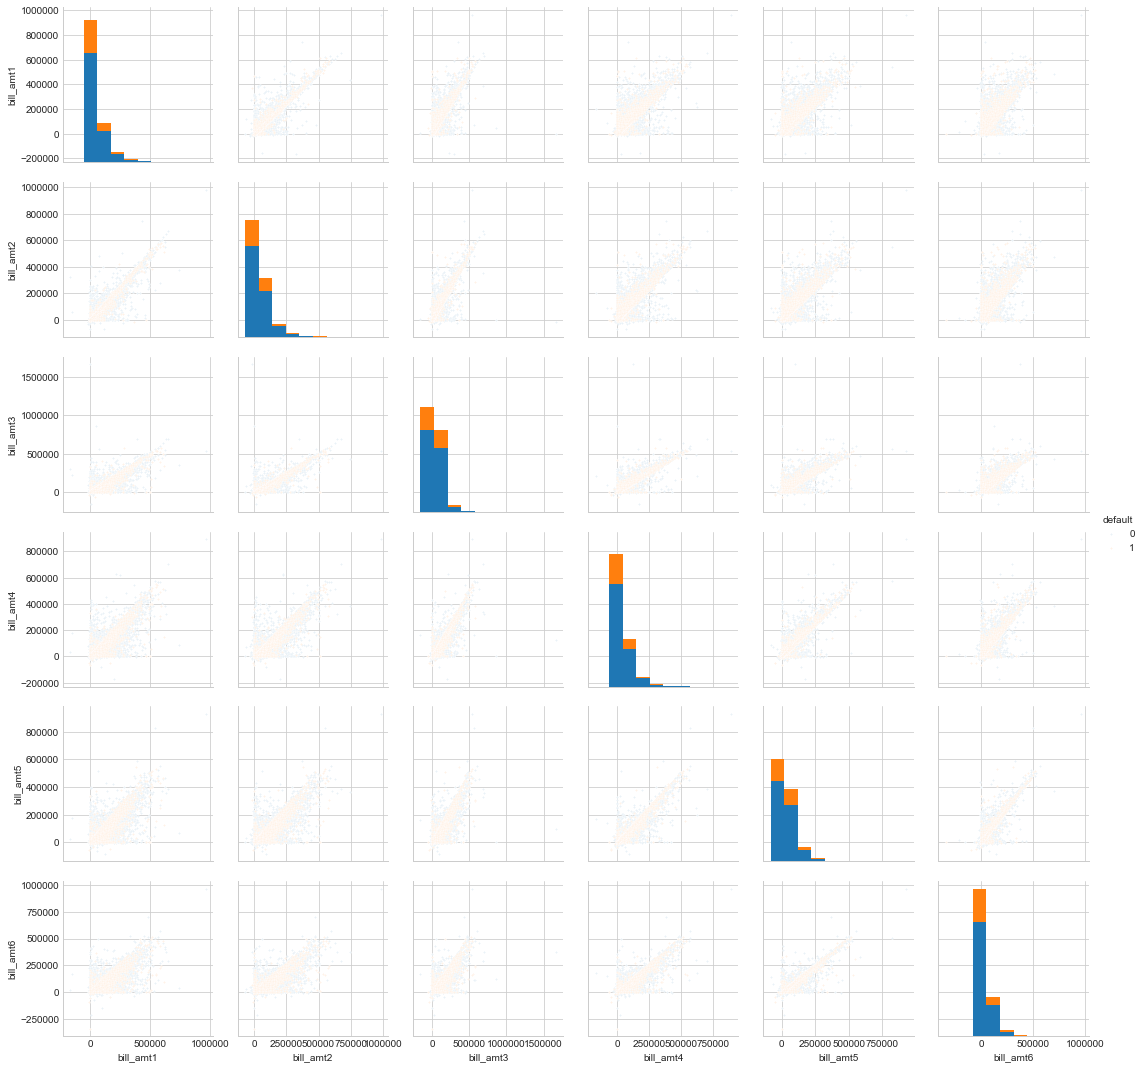

In [3]:
bill_amt_features = ['bill_amt'+str(i) for i in range(1,7)]
sns.pairplot(default, vars=bill_amt_features, hue='default',
             plot_kws={'s':2});

In [4]:
default[bill_amt_features].corr()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
bill_amt1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650
bill_amt2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594
bill_amt3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320
bill_amt4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941
bill_amt5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197
bill_amt6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000


In [5]:
from sklearn.decomposition import PCA

In [6]:
bill_amt_pca = PCA()
bill_amt_pca.fit(default[bill_amt_features])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
explainded_variance= pd.Series(100*bill_amt_pca.explained_variance_ratio_, 
                               index=['bill_amt_comp_'+str(i) for i in range(1,7)])

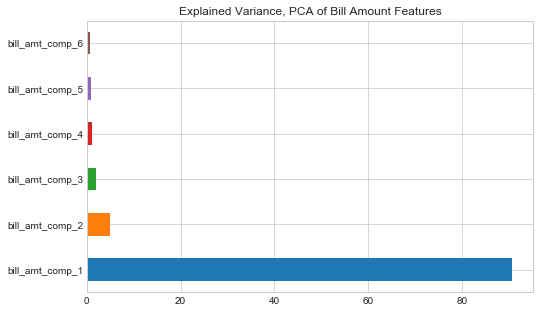

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
explainded_variance.plot(kind='barh', ax=ax);
ax.set_title('Explained Variance, PCA of Bill Amount Features');

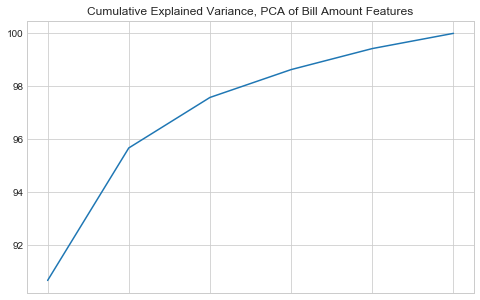

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
explainded_variance.cumsum().plot()
ax.set_title('Cumulative Explained Variance, PCA of Bill Amount Features');